In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.inspection import permutation_importance
from xgboost import plot_importance
import shap

from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize'] = [15, 6]

In [10]:
df_xgb = pd.read_csv("MODEL_READ_DATA.csv")

In [11]:
x = df_xgb.drop(columns=['loan_status', "dti_range"], axis=1).copy()
y = df_xgb['loan_status']
y = y.astype('int')

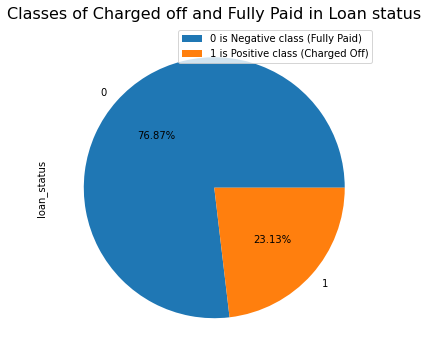

In [12]:
df_xgb.loan_status.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Classes of Charged off and Fully Paid in Loan status', fontsize=16)
plt.legend(labels=['0 is Negative class (Fully Paid)', '1 is Positive class (Charged Off)']) 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=42, stratify=y)

In [14]:
xgb_1st = xgb.XGBClassifier(objective='binary:logistic', # the loss function used
                            use_label_encoder=False, # to remove a warning about future release
                            random_state=42) # without fixed number of random_state, each time running model will generate a different result 

xgb_1st.fit(x_train, y_train, 
              verbose=1, # show messages while training 
              early_stopping_rounds=20, 
              eval_metric='aucpr',  
              eval_set=[(x_train, y_train), (x_test, y_test)])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-aucpr:0.40640	validation_1-aucpr:0.39569
[1]	validation_0-aucpr:0.42144	validation_1-aucpr:0.40899
[2]	validation_0-aucpr:0.42733	validation_1-aucpr:0.41394
[3]	validation_0-aucpr:0.43516	validation_1-aucpr:0.41915
[4]	validation_0-aucpr:0.43845	validation_1-aucpr:0.42119
[5]	validation_0-aucpr:0.44183	validation_1-aucpr:0.42293
[6]	validation_0-aucpr:0.44545	validation_1-aucpr:0.42425
[7]	validation_0-aucpr:0.44928	validation_1-aucpr:0.42586
[8]	validation_0-aucpr:0.45346	validation_1-aucpr:0.42732
[9]	validation_0-aucpr:0.45765	validation_1-aucpr:0.42894
[10]	validation_0-aucpr:0.46204	validation_1-aucpr:0.42971
[11]	validation_0-aucpr:0.46625	validation_1-aucpr:0.43158
[12]	validation_0-aucpr:0.46994	validation_1-aucpr:0.43213
[13]	validation_0-aucpr:0.47387	validation_1-aucpr:0.43224
[14]	validation_0-aucpr:0.47571	validation_1-aucpr:0.43253
[15]	validation_0-aucpr:0.47830	validation_1-aucpr:0.43307
[16]	validation_0-aucpr:0.48178	validation_1-aucpr:0.43380
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [15]:
def evaluate_model(model_name, data_x, data_y):
    
    # prediction on training/test set
    y_prediction = model_name.predict(data_x)
    print('\n') # insert a break line
    
    # print out the report of precision, recall, accuracy and f1 scores
    print('1) CLASSIFICATION REPORT:') 
    print(classification_report(data_y, y_prediction))
    print('\n')
    
    # print out confusion matrix coresponding to the data set
    print('2) CONFUSION MATRIX')
    plot_confusion_matrix(model_name, data_x, data_y, display_labels=(['Fully Paid','Charged Off']))



1) CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88    105014
           1       0.69      0.21      0.32     31596

    accuracy                           0.80    136610
   macro avg       0.75      0.59      0.60    136610
weighted avg       0.78      0.80      0.75    136610



2) CONFUSION MATRIX


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


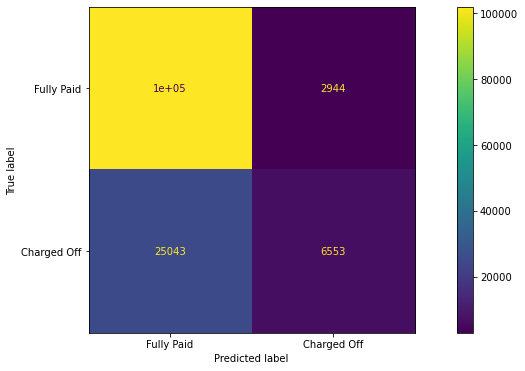

In [16]:
evaluate_model(xgb_1st, x_train, y_train)



1) CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     45006
           1       0.57      0.16      0.25     13542

    accuracy                           0.78     58548
   macro avg       0.68      0.56      0.56     58548
weighted avg       0.74      0.78      0.73     58548



2) CONFUSION MATRIX


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


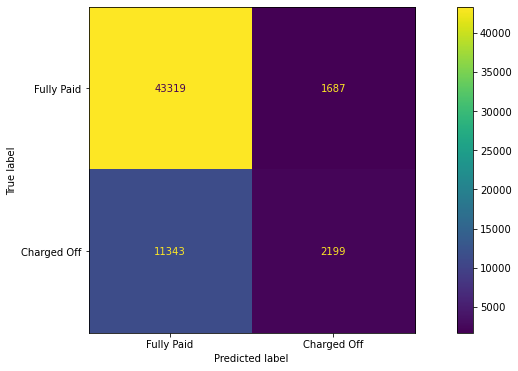

In [17]:
evaluate_model(xgb_1st, x_test, y_test)

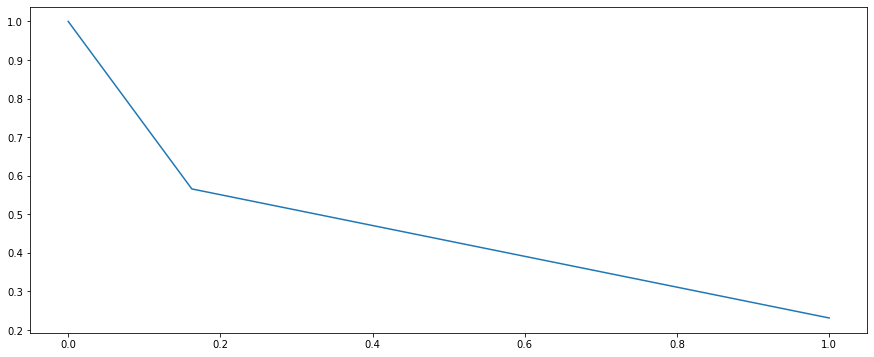

In [18]:
y_pred_1st = xgb_1st.predict(x_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred_1st)
plt.plot(recall, precision)

In [19]:
def learn_curves(fitted_model):
    
    # retrieve performance metrics
    results = fitted_model.evals_result()

    # plot learning curves
    plt.plot(results['validation_0']['aucpr'], label='Learning curve on training set')
    plt.plot(results['validation_1']['aucpr'], label='Learning curve on test set')

    # show the legends and plot
    plt.legend()

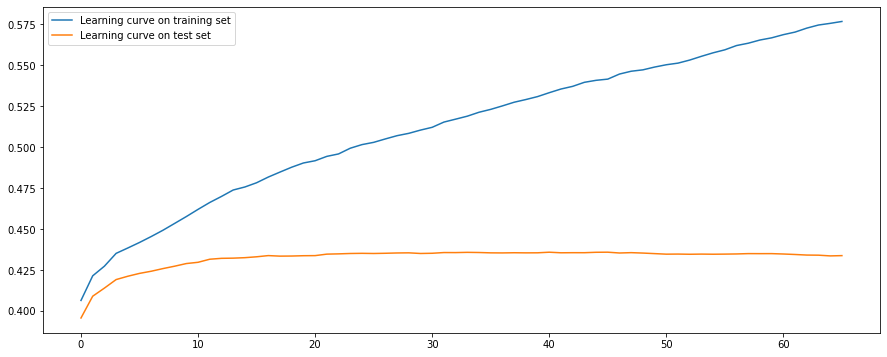

In [20]:
learn_curves(xgb_1st)

In [21]:
params = {'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
         'n_estimators': [100, 200, 400, 800, 1000],
         'scale_pos_weight': [1, 2, 3, 4],
         'max_depth': [3,4, 5,6, 7,8, 9,10],
         'gamma': [0, 0.01, 0.1, 0.5, 1, 2],
         'min_child_weight': [1, 2, 3, 4, 5,6,7,8,9,10],
         'colsample_bytree': [0.8, 0.9, 1],
         }

In [22]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
random = RandomizedSearchCV(xgb_1st, 
                            param_distributions=params, 
                            cv=kfold, 
                            n_iter=5, 
                            scoring='roc_auc',
                            n_jobs=-1)

random.fit(x_train, y_train)

print('Best hyperparameter:', random.best_params_)
print('Best score:', random.best_score_)

Best hyperparameter: {'scale_pos_weight': 2, 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1}
Best score: 0.7332683683891809


In [25]:
xgb_model_op = xgb.XGBClassifier(objective='binary:logistic',
                                  learning_rate=0.01, 
                                 scale_pos_weight=4,
                                 n_estimators=800,
                                 max_depth=5,
                                 min_child_weight=1,
                                 gamma=2, 
                                 colsample_bytree=1,
                                 use_label_encoder=False,
                                 random_state=42)

xgb_model_op.fit(x_train, y_train, 
                 verbose=1, 
                 early_stopping_rounds=10, 
                 eval_metric='aucpr', 
                 eval_set=[(x_train, y_train), (x_test, y_test)])

[0]	validation_0-aucpr:0.39210	validation_1-aucpr:0.39051
[1]	validation_0-aucpr:0.39957	validation_1-aucpr:0.39650
[2]	validation_0-aucpr:0.40065	validation_1-aucpr:0.39762
[3]	validation_0-aucpr:0.40104	validation_1-aucpr:0.39713
[4]	validation_0-aucpr:0.40074	validation_1-aucpr:0.39707
[5]	validation_0-aucpr:0.40334	validation_1-aucpr:0.40026
[6]	validation_0-aucpr:0.40387	validation_1-aucpr:0.40039
[7]	validation_0-aucpr:0.40418	validation_1-aucpr:0.40123
[8]	validation_0-aucpr:0.40455	validation_1-aucpr:0.40117
[9]	validation_0-aucpr:0.40440	validation_1-aucpr:0.40131
[10]	validation_0-aucpr:0.40497	validation_1-aucpr:0.40166
[11]	validation_0-aucpr:0.40503	validation_1-aucpr:0.40161
[12]	validation_0-aucpr:0.40694	validation_1-aucpr:0.40331
[13]	validation_0-aucpr:0.40689	validation_1-aucpr:0.40309
[14]	validation_0-aucpr:0.40688	validation_1-aucpr:0.40315
[15]	validation_0-aucpr:0.40698	validation_1-aucpr:0.40309
[16]	validation_0-aucpr:0.40801	validation_1-aucpr:0.40380
[17]	va

[139]	validation_0-aucpr:0.42707	validation_1-aucpr:0.41821
[140]	validation_0-aucpr:0.42716	validation_1-aucpr:0.41828
[141]	validation_0-aucpr:0.42736	validation_1-aucpr:0.41834
[142]	validation_0-aucpr:0.42748	validation_1-aucpr:0.41841
[143]	validation_0-aucpr:0.42759	validation_1-aucpr:0.41848
[144]	validation_0-aucpr:0.42772	validation_1-aucpr:0.41855
[145]	validation_0-aucpr:0.42795	validation_1-aucpr:0.41872
[146]	validation_0-aucpr:0.42804	validation_1-aucpr:0.41876
[147]	validation_0-aucpr:0.42819	validation_1-aucpr:0.41885
[148]	validation_0-aucpr:0.42839	validation_1-aucpr:0.41898
[149]	validation_0-aucpr:0.42853	validation_1-aucpr:0.41910
[150]	validation_0-aucpr:0.42864	validation_1-aucpr:0.41915
[151]	validation_0-aucpr:0.42888	validation_1-aucpr:0.41928
[152]	validation_0-aucpr:0.42909	validation_1-aucpr:0.41936
[153]	validation_0-aucpr:0.42921	validation_1-aucpr:0.41943
[154]	validation_0-aucpr:0.42935	validation_1-aucpr:0.41951
[155]	validation_0-aucpr:0.42957	validat

[276]	validation_0-aucpr:0.44476	validation_1-aucpr:0.42768
[277]	validation_0-aucpr:0.44489	validation_1-aucpr:0.42774
[278]	validation_0-aucpr:0.44500	validation_1-aucpr:0.42781
[279]	validation_0-aucpr:0.44511	validation_1-aucpr:0.42784
[280]	validation_0-aucpr:0.44522	validation_1-aucpr:0.42789
[281]	validation_0-aucpr:0.44532	validation_1-aucpr:0.42793
[282]	validation_0-aucpr:0.44543	validation_1-aucpr:0.42799
[283]	validation_0-aucpr:0.44557	validation_1-aucpr:0.42804
[284]	validation_0-aucpr:0.44565	validation_1-aucpr:0.42809
[285]	validation_0-aucpr:0.44580	validation_1-aucpr:0.42819
[286]	validation_0-aucpr:0.44592	validation_1-aucpr:0.42826
[287]	validation_0-aucpr:0.44604	validation_1-aucpr:0.42831
[288]	validation_0-aucpr:0.44614	validation_1-aucpr:0.42834
[289]	validation_0-aucpr:0.44626	validation_1-aucpr:0.42841
[290]	validation_0-aucpr:0.44635	validation_1-aucpr:0.42845
[291]	validation_0-aucpr:0.44647	validation_1-aucpr:0.42850
[292]	validation_0-aucpr:0.44659	validat

[413]	validation_0-aucpr:0.45752	validation_1-aucpr:0.43346
[414]	validation_0-aucpr:0.45762	validation_1-aucpr:0.43352
[415]	validation_0-aucpr:0.45771	validation_1-aucpr:0.43354
[416]	validation_0-aucpr:0.45776	validation_1-aucpr:0.43358
[417]	validation_0-aucpr:0.45784	validation_1-aucpr:0.43363
[418]	validation_0-aucpr:0.45788	validation_1-aucpr:0.43366
[419]	validation_0-aucpr:0.45797	validation_1-aucpr:0.43369
[420]	validation_0-aucpr:0.45804	validation_1-aucpr:0.43372
[421]	validation_0-aucpr:0.45811	validation_1-aucpr:0.43376
[422]	validation_0-aucpr:0.45818	validation_1-aucpr:0.43378
[423]	validation_0-aucpr:0.45827	validation_1-aucpr:0.43383
[424]	validation_0-aucpr:0.45831	validation_1-aucpr:0.43384
[425]	validation_0-aucpr:0.45838	validation_1-aucpr:0.43385
[426]	validation_0-aucpr:0.45844	validation_1-aucpr:0.43389
[427]	validation_0-aucpr:0.45851	validation_1-aucpr:0.43392
[428]	validation_0-aucpr:0.45861	validation_1-aucpr:0.43392
[429]	validation_0-aucpr:0.45867	validat

[550]	validation_0-aucpr:0.46609	validation_1-aucpr:0.43654
[551]	validation_0-aucpr:0.46613	validation_1-aucpr:0.43655
[552]	validation_0-aucpr:0.46620	validation_1-aucpr:0.43660
[553]	validation_0-aucpr:0.46625	validation_1-aucpr:0.43662
[554]	validation_0-aucpr:0.46632	validation_1-aucpr:0.43665
[555]	validation_0-aucpr:0.46637	validation_1-aucpr:0.43668
[556]	validation_0-aucpr:0.46641	validation_1-aucpr:0.43669
[557]	validation_0-aucpr:0.46644	validation_1-aucpr:0.43669
[558]	validation_0-aucpr:0.46651	validation_1-aucpr:0.43672
[559]	validation_0-aucpr:0.46658	validation_1-aucpr:0.43675
[560]	validation_0-aucpr:0.46664	validation_1-aucpr:0.43676
[561]	validation_0-aucpr:0.46669	validation_1-aucpr:0.43679
[562]	validation_0-aucpr:0.46673	validation_1-aucpr:0.43681
[563]	validation_0-aucpr:0.46677	validation_1-aucpr:0.43683
[564]	validation_0-aucpr:0.46684	validation_1-aucpr:0.43685
[565]	validation_0-aucpr:0.46689	validation_1-aucpr:0.43686
[566]	validation_0-aucpr:0.46692	validat

[687]	validation_0-aucpr:0.47285	validation_1-aucpr:0.43889
[688]	validation_0-aucpr:0.47289	validation_1-aucpr:0.43893
[689]	validation_0-aucpr:0.47293	validation_1-aucpr:0.43894
[690]	validation_0-aucpr:0.47297	validation_1-aucpr:0.43895
[691]	validation_0-aucpr:0.47301	validation_1-aucpr:0.43894
[692]	validation_0-aucpr:0.47306	validation_1-aucpr:0.43897
[693]	validation_0-aucpr:0.47309	validation_1-aucpr:0.43897
[694]	validation_0-aucpr:0.47312	validation_1-aucpr:0.43899
[695]	validation_0-aucpr:0.47317	validation_1-aucpr:0.43900
[696]	validation_0-aucpr:0.47323	validation_1-aucpr:0.43900
[697]	validation_0-aucpr:0.47326	validation_1-aucpr:0.43901
[698]	validation_0-aucpr:0.47333	validation_1-aucpr:0.43901
[699]	validation_0-aucpr:0.47336	validation_1-aucpr:0.43904
[700]	validation_0-aucpr:0.47341	validation_1-aucpr:0.43905
[701]	validation_0-aucpr:0.47345	validation_1-aucpr:0.43906
[702]	validation_0-aucpr:0.47348	validation_1-aucpr:0.43907
[703]	validation_0-aucpr:0.47351	validat

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=800,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)



1) CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69     45006
           1       0.34      0.76      0.47     13542

    accuracy                           0.61     58548
   macro avg       0.62      0.66      0.58     58548
weighted avg       0.76      0.61      0.64     58548



2) CONFUSION MATRIX


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


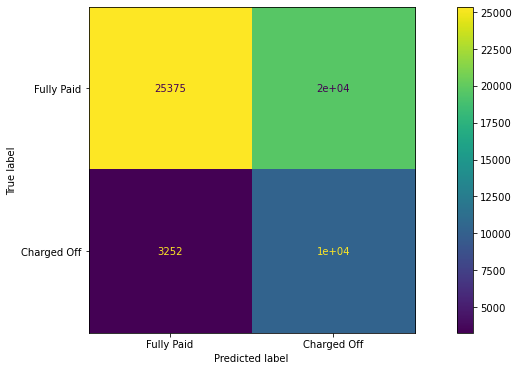

In [26]:
evaluate_model(xgb_model_op, x_test, y_test)

In [27]:
y_pred_prob_op = xgb_model_op.predict_proba(x_test)[:,1] # filter results for the positive class only
print('Optimized model:', roc_auc_score(y_test, y_pred_prob_op))

y_pred_prob_1st = xgb_1st.predict_proba(x_test)[:,1] 
print('Initial model:', roc_auc_score(y_test, y_pred_prob_1st))

Optimized model: 0.7282568333510175
Initial model: 0.7254876124985794


In [28]:
print('AUC PR of the initial model:', average_precision_score(y_test, y_pred_1st))
y_pred_op = xgb_model_op.predict(x_test)
print('AUC PR of the model after tuning:', average_precision_score(y_test, y_pred_op))

AUC PR of the initial model: 0.2856277519245852
AUC PR of the model after tuning: 0.3168636793385814


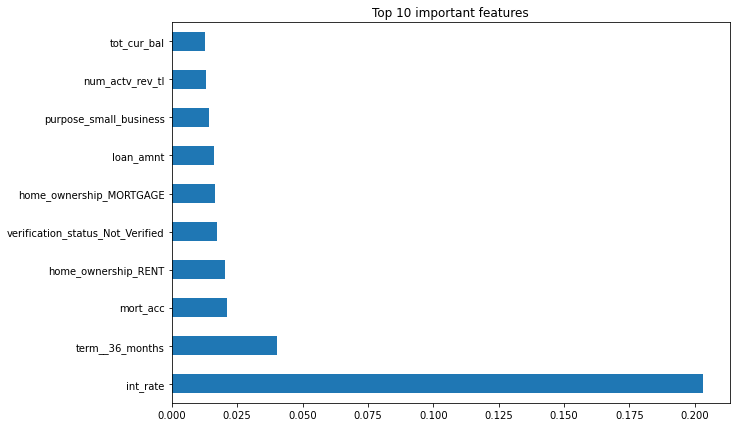

In [29]:
feat_importances = pd.Series(xgb_model_op.feature_importances_, index=x.columns)

feat_importances.nlargest(10).plot(kind='barh', figsize=(10,7))
plt.title("Top 10 important features")

xgb_model_op.importance_type

In [30]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x.columns, xgb_model_op.feature_importances_):
    feats[feature] = importance #add the name/value pair
    feats.update(feats)
    
# turn the dictionary into dataframe with suitable column names
df_feat_im = pd.DataFrame.from_dict(feats, orient='index')
df_feat_im.reset_index(inplace=True)
df_feat_im.rename(columns={"index": "feature", 0:'score'}, inplace=True)

# sort the table values from higest to lowest order
df_feat_im.sort_values('score', ascending=False)

,feature,score
3,int_rate,0.203264
156,term__36_months,0.040090
28,mort_acc,0.021262
109,home_ownership_RENT,0.020526
103,verification_status_Not_Verified,0.017178
107,home_ownership_MORTGAGE,0.016653
2,loan_amnt,0.016268
100,purpose_small_business,0.014165
31,num_actv_rev_tl,0.012888
10,tot_cur_bal,0.012852


In [31]:
for thresh in [0.005, 0.01]:
    # select features using the thresholds
    selection = SelectFromModel(xgb_model_op, threshold=thresh, prefit=True) 
    select_x_train = selection.transform(x_train)
    # train the model
    selection_model = xgb.XGBClassifier(objective='binary:logistic',
                                          learning_rate=0.01, 
                                         scale_pos_weight=4,
                                         n_estimators=800,
                                         max_depth=5,
                                         min_child_weight=1,
                                         gamma=2, 
                                         colsample_bytree=1,
                                        use_label_encoder=False, random_state=42)
    selection_model.fit(select_x_train, y_train, eval_metric='aucpr')
    # evaluate the model on test set
    select_x_test = selection.transform(x_test)
    predictions = selection_model.predict(select_x_test)
    print('Threshold:', thresh, '- Number of features:', select_x_train.shape[1], 
          '- Recall score:', recall_score(y_test, predictions)*100)

X has feature names, but SelectFromModel was fitted without feature names
`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
X has feature names, but SelectFromModel was fitted without feature names


Threshold: 0.005 - Number of features: 71 - Recall score: 75.99320632107516


X has feature names, but SelectFromModel was fitted without feature names
`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


Threshold: 0.01 - Number of features: 17 - Recall score: 76.14827942696795


X has feature names, but SelectFromModel was fitted without feature names


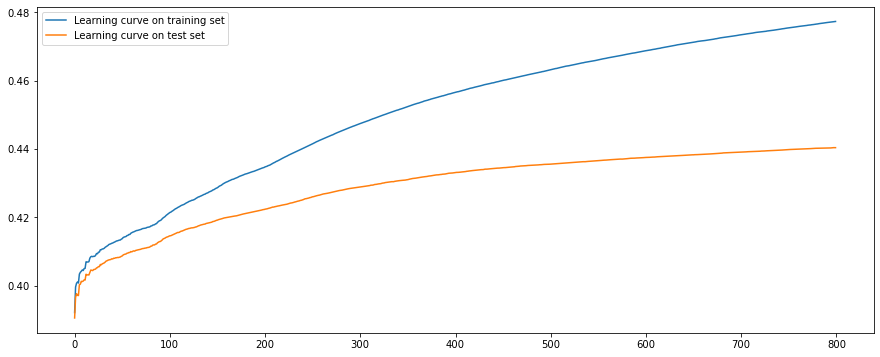

In [32]:
learn_curves(xgb_model_op)

In [33]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              learning_rate=0.05,
                              scale_pos_weight=3,
                              n_estimators=200,
                              max_depth=5,
                              min_child_weight=1,
                              gamma=0.5,
                              colsample_bytree=1,
                              subsample=1,
                              use_label_encoder=False,
                              random_state=42)

xgb_model.fit(x_train, y_train, 
              verbose=0, 
              early_stopping_rounds=10, 
              eval_metric='aucpr', 
              eval_set=[(x_train, y_train), (x_test, y_test)])

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)



1) CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     45006
           1       0.38      0.64      0.48     13542

    accuracy                           0.68     58548
   macro avg       0.62      0.66      0.62     58548
weighted avg       0.75      0.68      0.70     58548



2) CONFUSION MATRIX


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


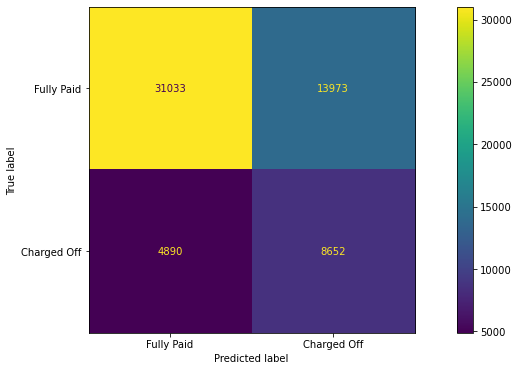

In [34]:
evaluate_model(xgb_model, x_test, y_test)

In [35]:
y_pred_prob = xgb_model.predict_proba(x_test)[:,1]
roc_auc_score(y_test, y_pred_prob).round(2)

0.73

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.


Text(0.5, 1.0, 'ROC curve')

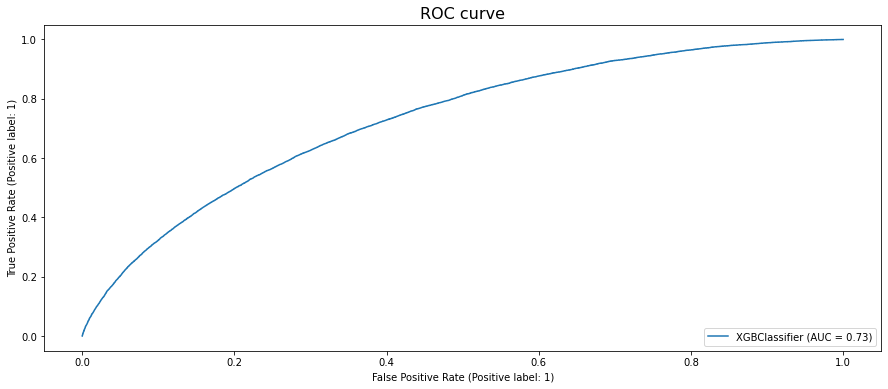

In [36]:
plot_roc_curve(xgb_model, x_test, y_test)
plt.title('ROC curve', fontsize=16)

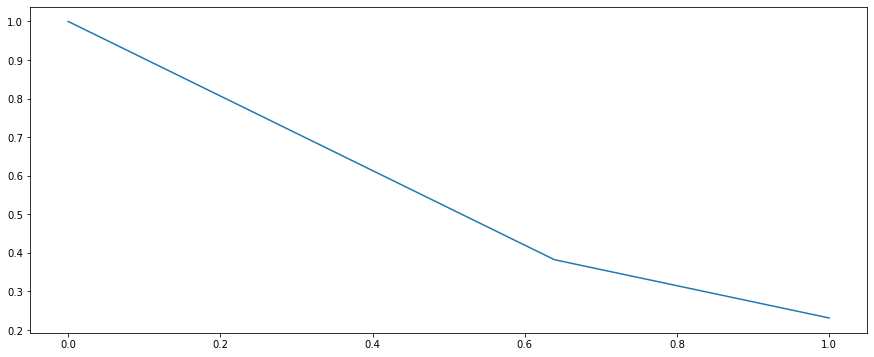

In [37]:
y_pred_xgb = xgb_model.predict(x_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)
plt.plot(recall, precision)

In [38]:
average_precision_score(y_test, xgb_model.predict(x_test))

0.3278426785655767

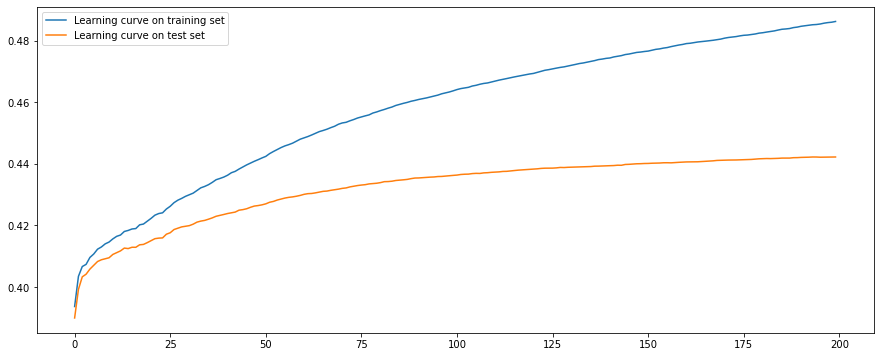

In [39]:
learn_curves(xgb_model)

In [40]:
%%time
scores = cross_val_score(xgb_model, x, y, cv=kfold)
print('Accuracy:', np.round(scores, 3))
print('Accuracy mean: %0.3f' % (scores.mean()))

Accuracy: [0.679 0.682 0.678 0.681 0.676]
Accuracy mean: 0.679
CPU times: total: 23min 23s
Wall time: 2min 5s


# SHAP

In [41]:
result_test = permutation_importance(xgb_model, x_test, y_test, 
                                     n_repeats=5, # randomly shuffled each feature 5 times
                                     random_state=42,  
                                     n_jobs=2)
sorted_idx = result_test.importances_mean.argsort()

In [42]:
result_train = permutation_importance(xgb_model, x_train, y_train, n_repeats=5, random_state=42, n_jobs=2)
sorted_idx = result_train.importances_mean.argsort()

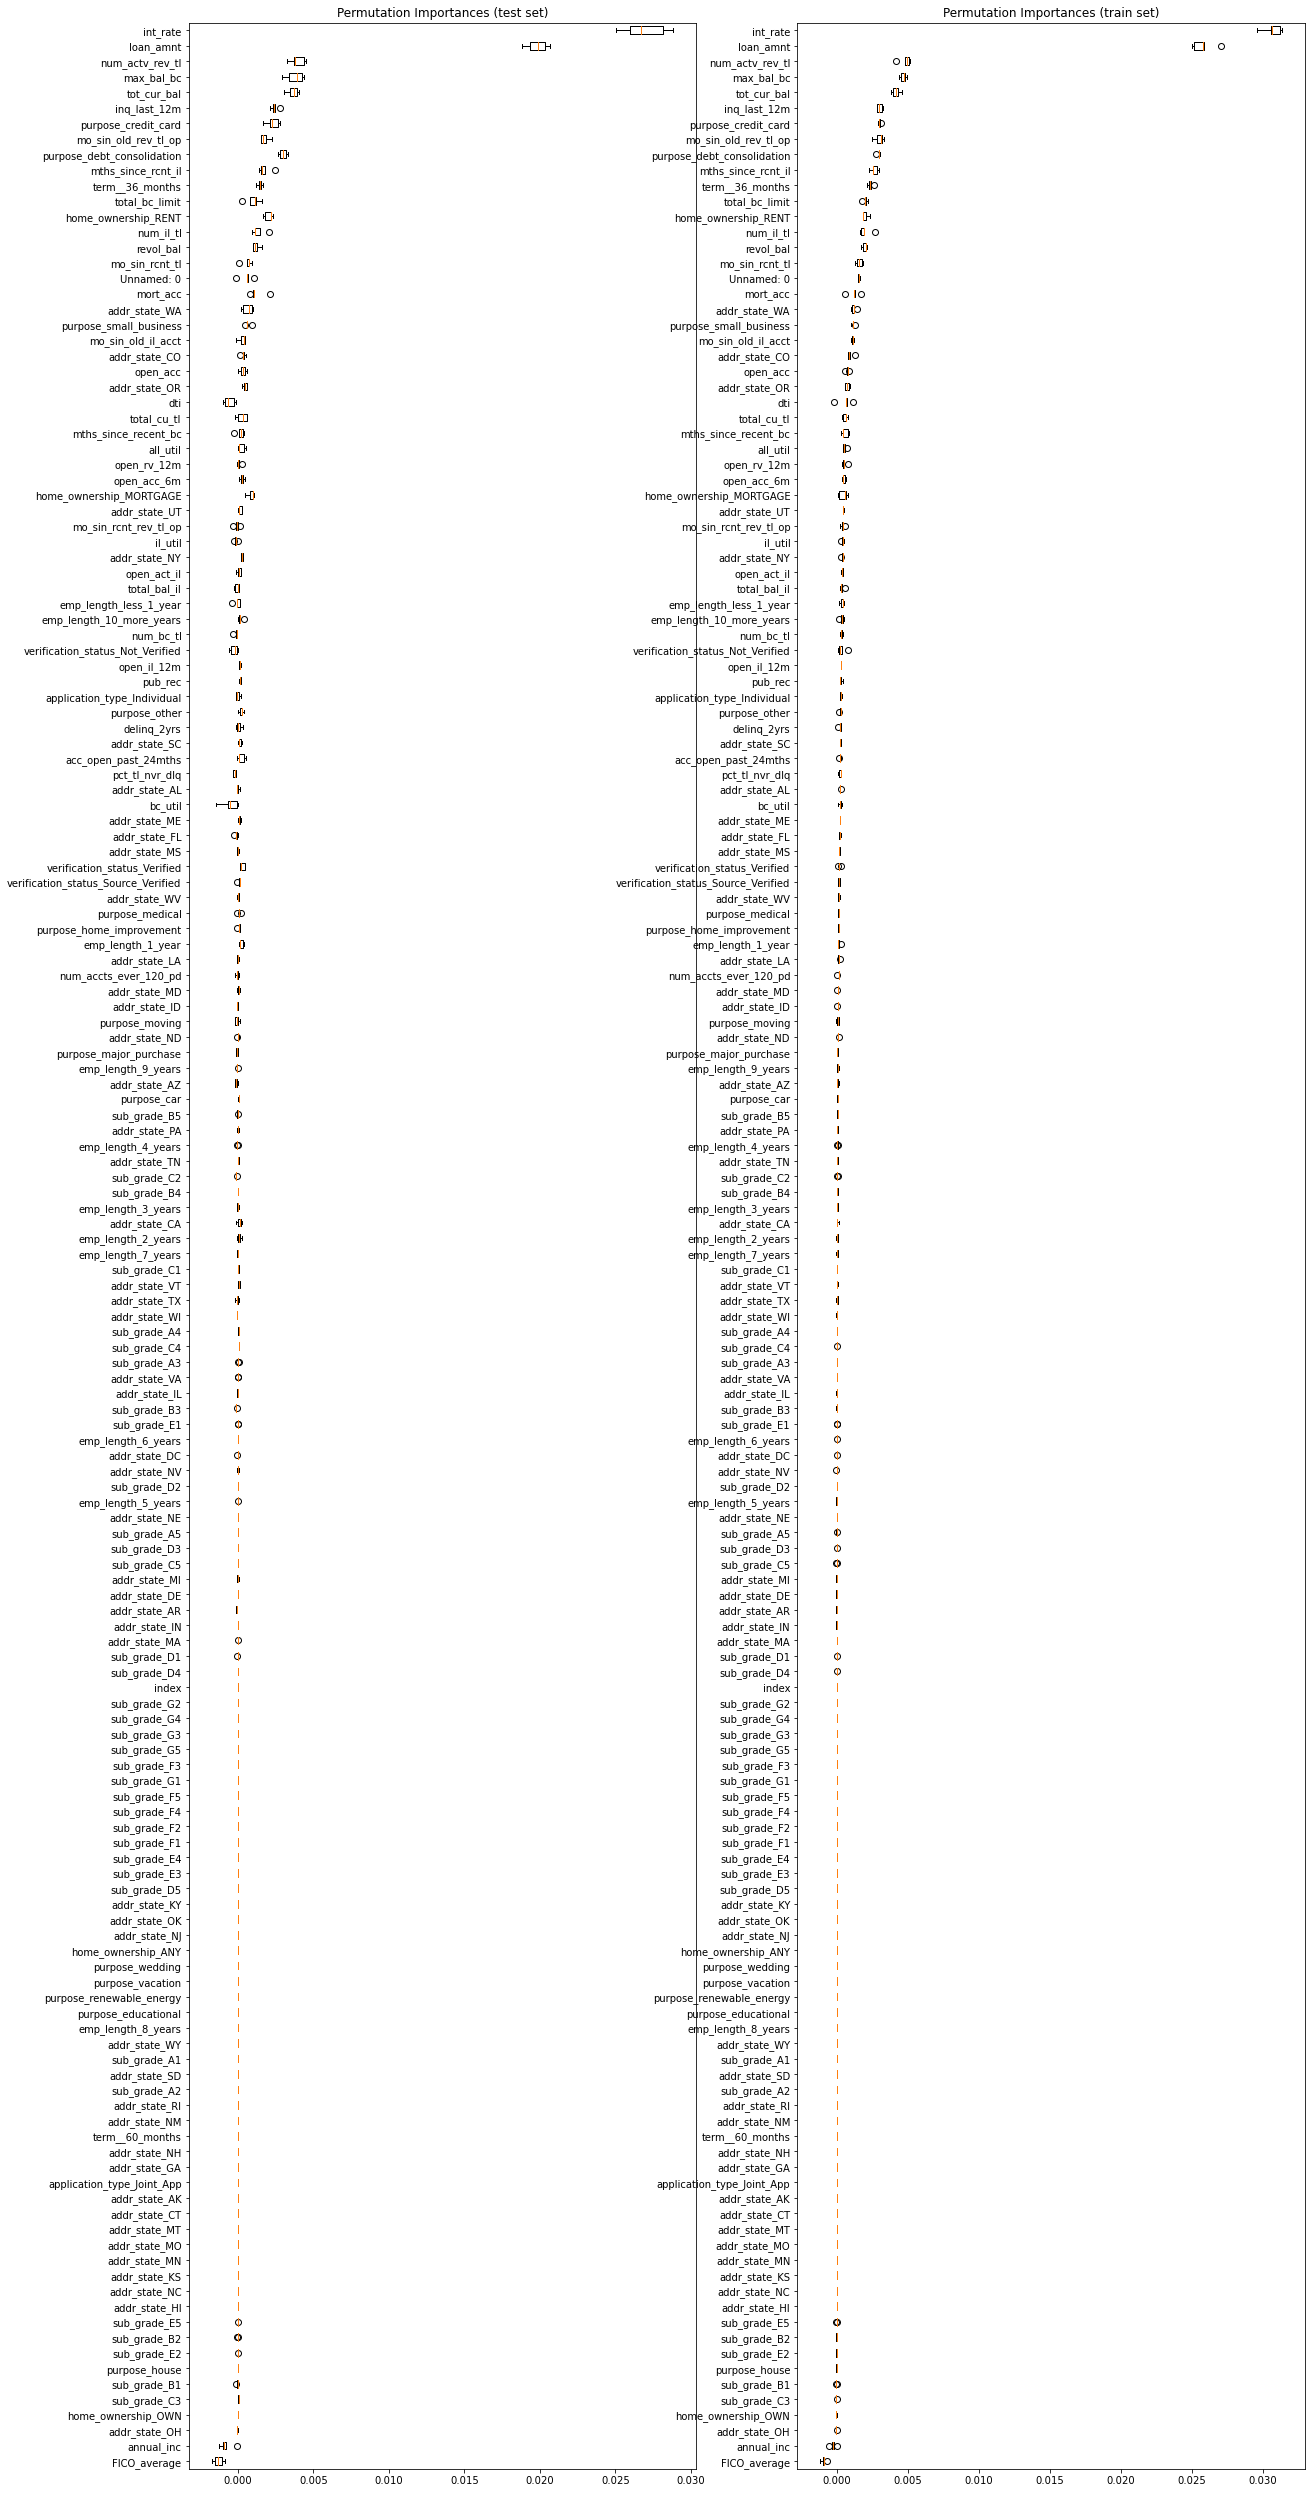

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 45)) #, sharey=True

# test set
ax1.boxplot(result_test.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])
ax1.set_title("Permutation Importances (test set)")

# training set
ax2.boxplot(result_train.importances[sorted_idx].T, vert=False, labels=x_train.columns[sorted_idx])
ax2.set_title("Permutation Importances (train set)")

plt.show()

Text(0.5, 1.0, 'Top 10 important features')

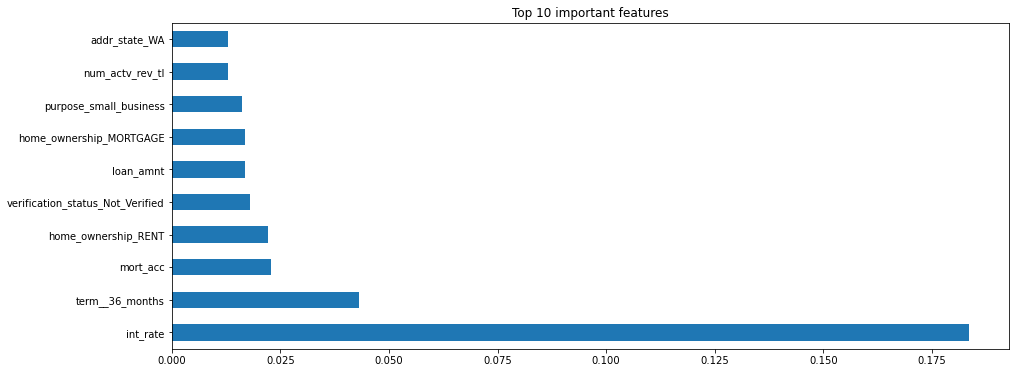

In [44]:
feat_importances = pd.Series(xgb_model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features")

In [45]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(x_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [46]:
shap_values = shap.Explainer(xgb_model).shap_values(x_train)

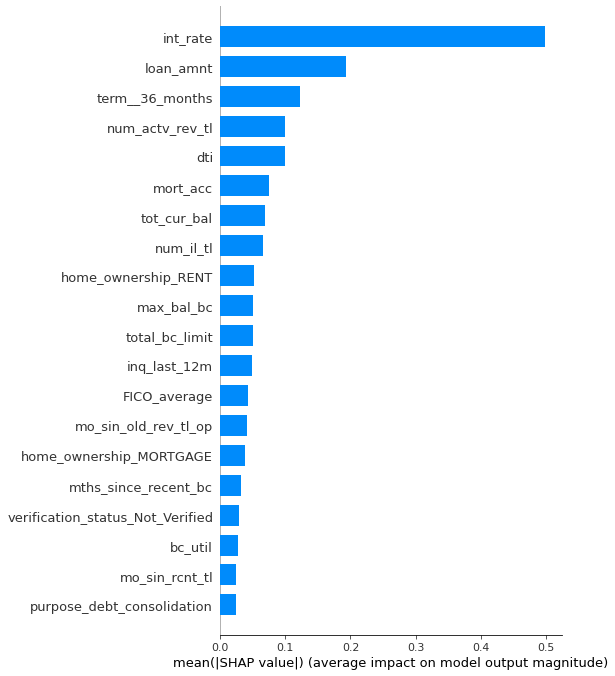

In [47]:
shap.summary_plot(shap_values, x_train, plot_type="bar", show=False)
plt.savefig('Shap_plot_01.png', bbox_inches='tight')

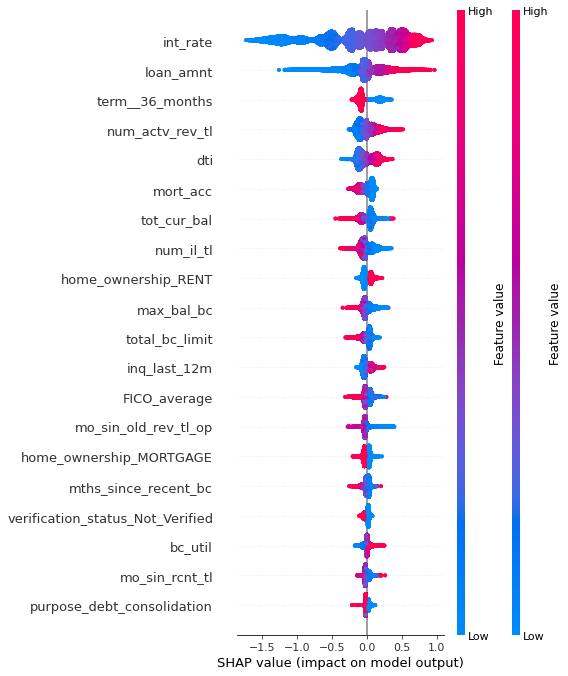

In [48]:
shap.summary_plot(shap_values, x_train, show=False)
shap.summary_plot(shap_values, x_train, show=False)


In [49]:
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_train)

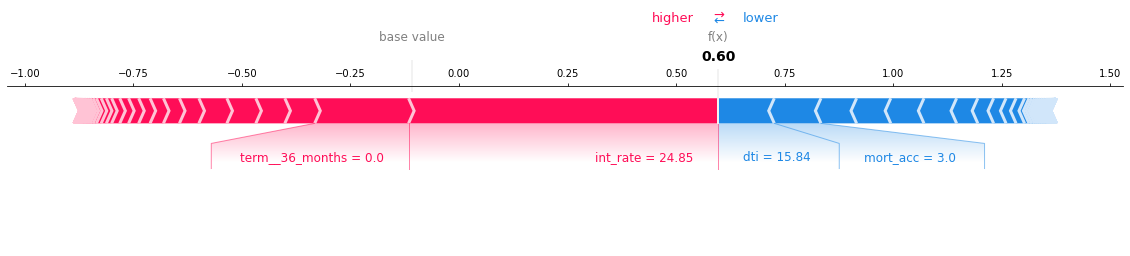

In [50]:
def shap_indiv_plot(m):
    return shap.force_plot(explainer.expected_value, shap_values[m], x_train.iloc[[m]],  # filter the row only
                          show=False,matplotlib=True).savefig('Shap_plot_03.png', bbox_inches='tight')

# plot the Shap values for the 9th data point/borrower in the dataset, for example
shap_indiv_plot(9)